In [128]:
import mysql.connector
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [129]:
conexion = mysql.connector.connect(user="root",password="", host="localhost",database="northwind",port="3306")

In [130]:
cur = conexion.cursor()                               
cur.execute("""select o.OrderID,c.CustomerName,e.FirstName,s.ShipperName,p.ProductName, p.Price*od.Quantity as Valor_Total FROM orders as o
LEFT JOIN customers as c ON c.CustomerID = o.CustomerID
LEFT JOIN employees as e ON e.EmployeeID = o.EmployeeID
LEFT JOIN shippers as s ON s.ShipperID =o.ShipperID
LEFT JOIN orderdetails as od on od.OrderID = o.OrderID
LEFT JOIN products as p ON p.ProductID = od.ProductID;""")   
productos_en_bodega = ("CUR",cur.fetchall()) 

In [131]:
cur.execute("""select o.OrderID,c.CustomerName,e.FirstName,s.ShipperName,p.ProductName, p.Price*od.Quantity as Valor_Total FROM orders as o
LEFT JOIN customers as c ON c.CustomerID = o.CustomerID
LEFT JOIN employees as e ON e.EmployeeID = o.EmployeeID
LEFT JOIN shippers as s ON s.ShipperID =o.ShipperID
LEFT JOIN orderdetails as od on od.OrderID = o.OrderID
LEFT JOIN products as p ON p.ProductID = od.ProductID;""")
data = cur.fetchall()   
 
df = pd.DataFrame(data, columns=[i[0] for i in cur.description])
df.head()

,OrderID,CustomerName,FirstName,ShipperName,ProductName,Valor_Total
0,10248,Wilman Kala,Steven,Federal Shipping,Queso Cabrales,252
1,10248,Wilman Kala,Steven,Federal Shipping,Singaporean Hokkien Fried Mee,140
2,10248,Wilman Kala,Steven,Federal Shipping,Mozzarella di Giovanni,175
3,10249,Tradição Hipermercados,Michael,Speedy Express,Tofu,207
4,10249,Tradição Hipermercados,Michael,Speedy Express,Manjimup Dried Apples,2120


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderID       518 non-null    int64 
 1   CustomerName  518 non-null    object
 2   FirstName     518 non-null    object
 3   ShipperName   518 non-null    object
 4   ProductName   518 non-null    object
 5   Valor_Total   518 non-null    object
dtypes: int64(1), object(5)
memory usage: 24.4+ KB


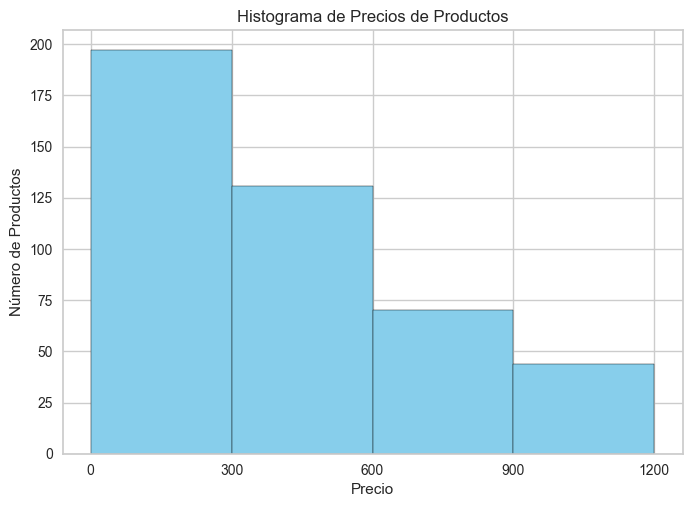

In [133]:
plt.hist(df['Valor_Total'], bins=[0,300,600,900,1200], edgecolor='black', color='skyblue')

# Etiquetas de ejes
plt.xlabel('Precio')
plt.ylabel('Número de Productos')
plt.title('Histograma de Precios de Productos')

# Definir los intervalos en el eje x
plt.xticks([0,300,600,900,1200])

# Mostrar el histograma
plt.show()

Breve visualizacion para ver qué distribucion tienen los precios de los productos

Text(0.5, 1.0, 'Distribuidor')

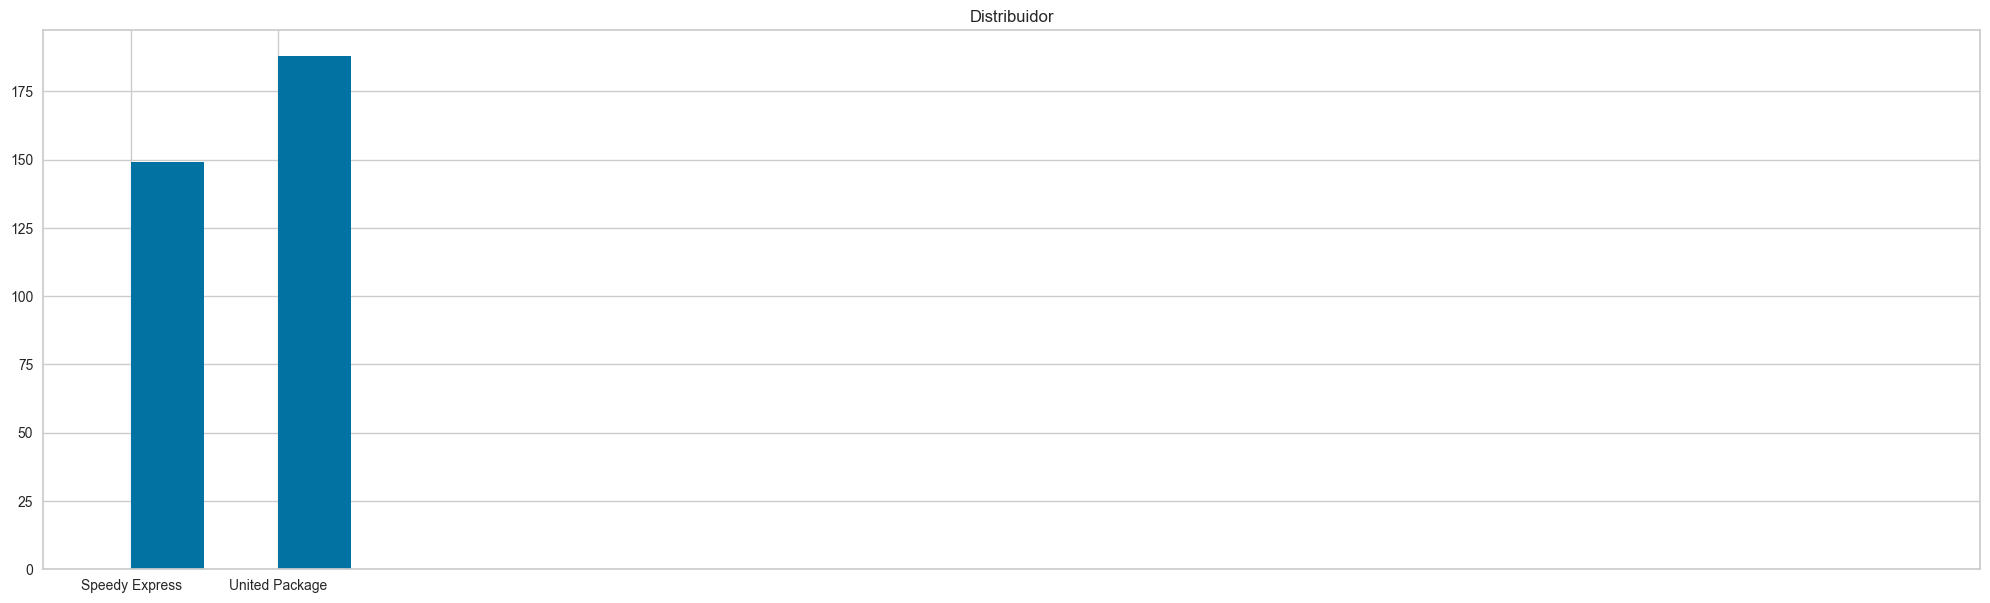

In [134]:
plt.rcParams["figure.figsize"] = (25, 7)
plt.hist(x =df["ShipperName"],bins = [1,2,3,4,5,6,7,8,9,10,11,12,13],width = 0.5)
plt.title("Distribuidor")

Text(0.5, 1.0, 'Producto')

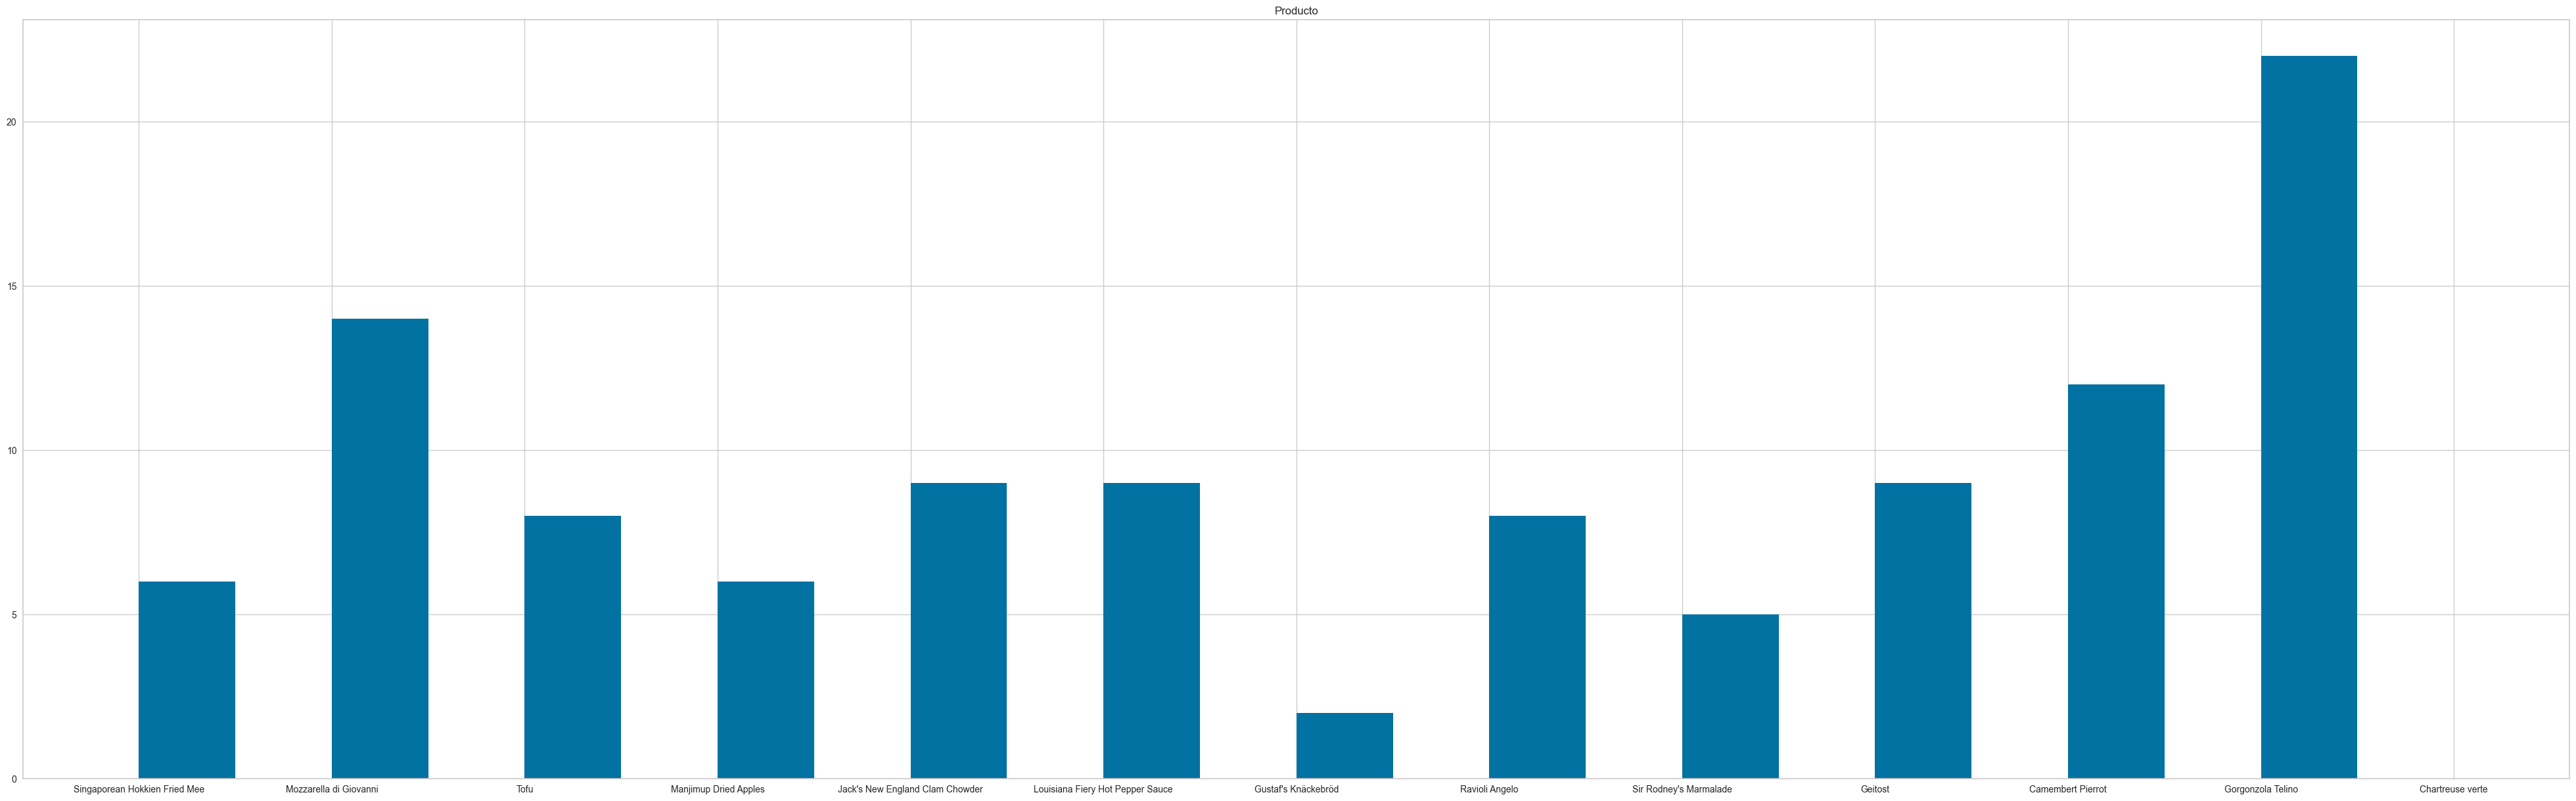

In [135]:
plt.rcParams["figure.figsize"] = (50, 15)
plt.hist(x =df["ProductName"],bins = [1,2,3,4,5,6,7,8,9,10,11,12,13],width = 0.5)
plt.title("Producto")

In [136]:
df = df[["ShipperName","Valor_Total","ProductName"]]
df

,ShipperName,Valor_Total,ProductName
0,Federal Shipping,252,Queso Cabrales
1,Federal Shipping,140,Singaporean Hokkien Fried Mee
2,Federal Shipping,175,Mozzarella di Giovanni
3,Speedy Express,207,Tofu
4,Speedy Express,2120,Manjimup Dried Apples
...,...,...,...
513,United Package,630,Queso Cabrales
514,United Package,560,Tourtière
515,United Package,1020,Louisiana Hot Spiced Okra
516,Speedy Express,126,Queso Cabrales


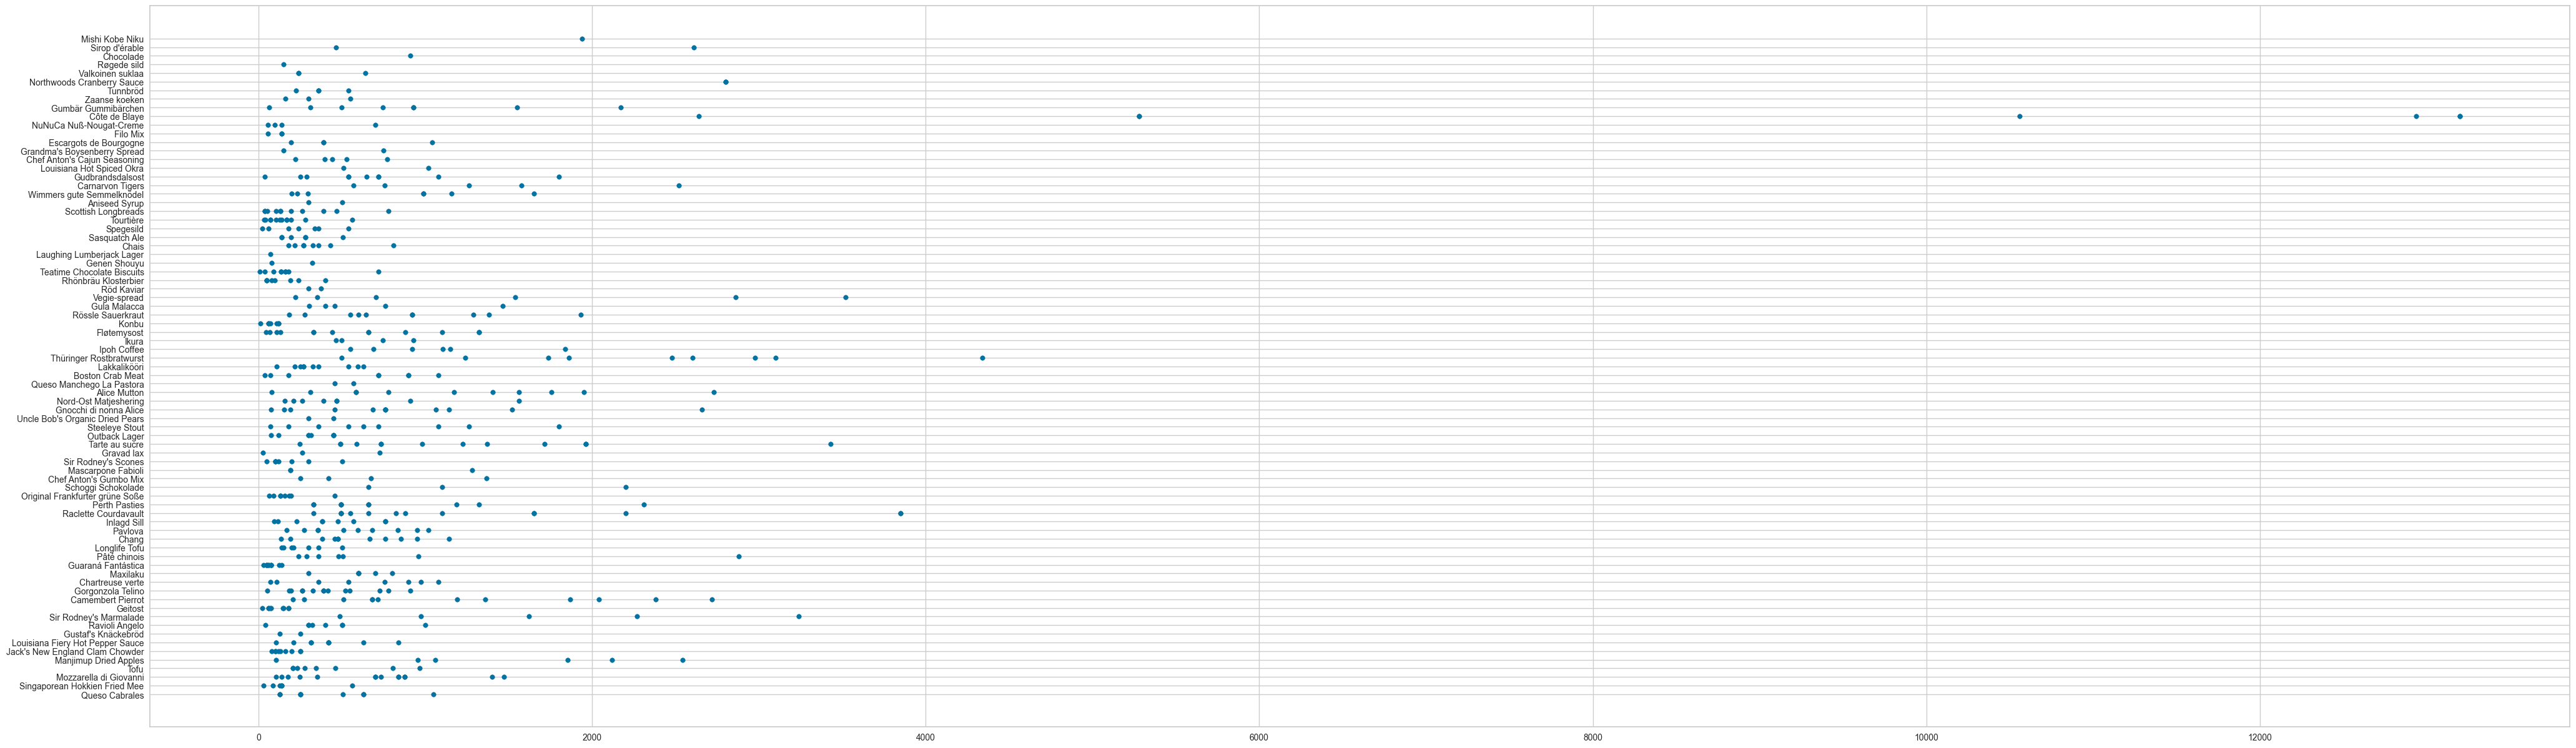

In [139]:
f1 = df['Valor_Total'].values
f2 = df['ProductName'].values
 
plt.scatter(f1, f2, s=30)
plt.show()

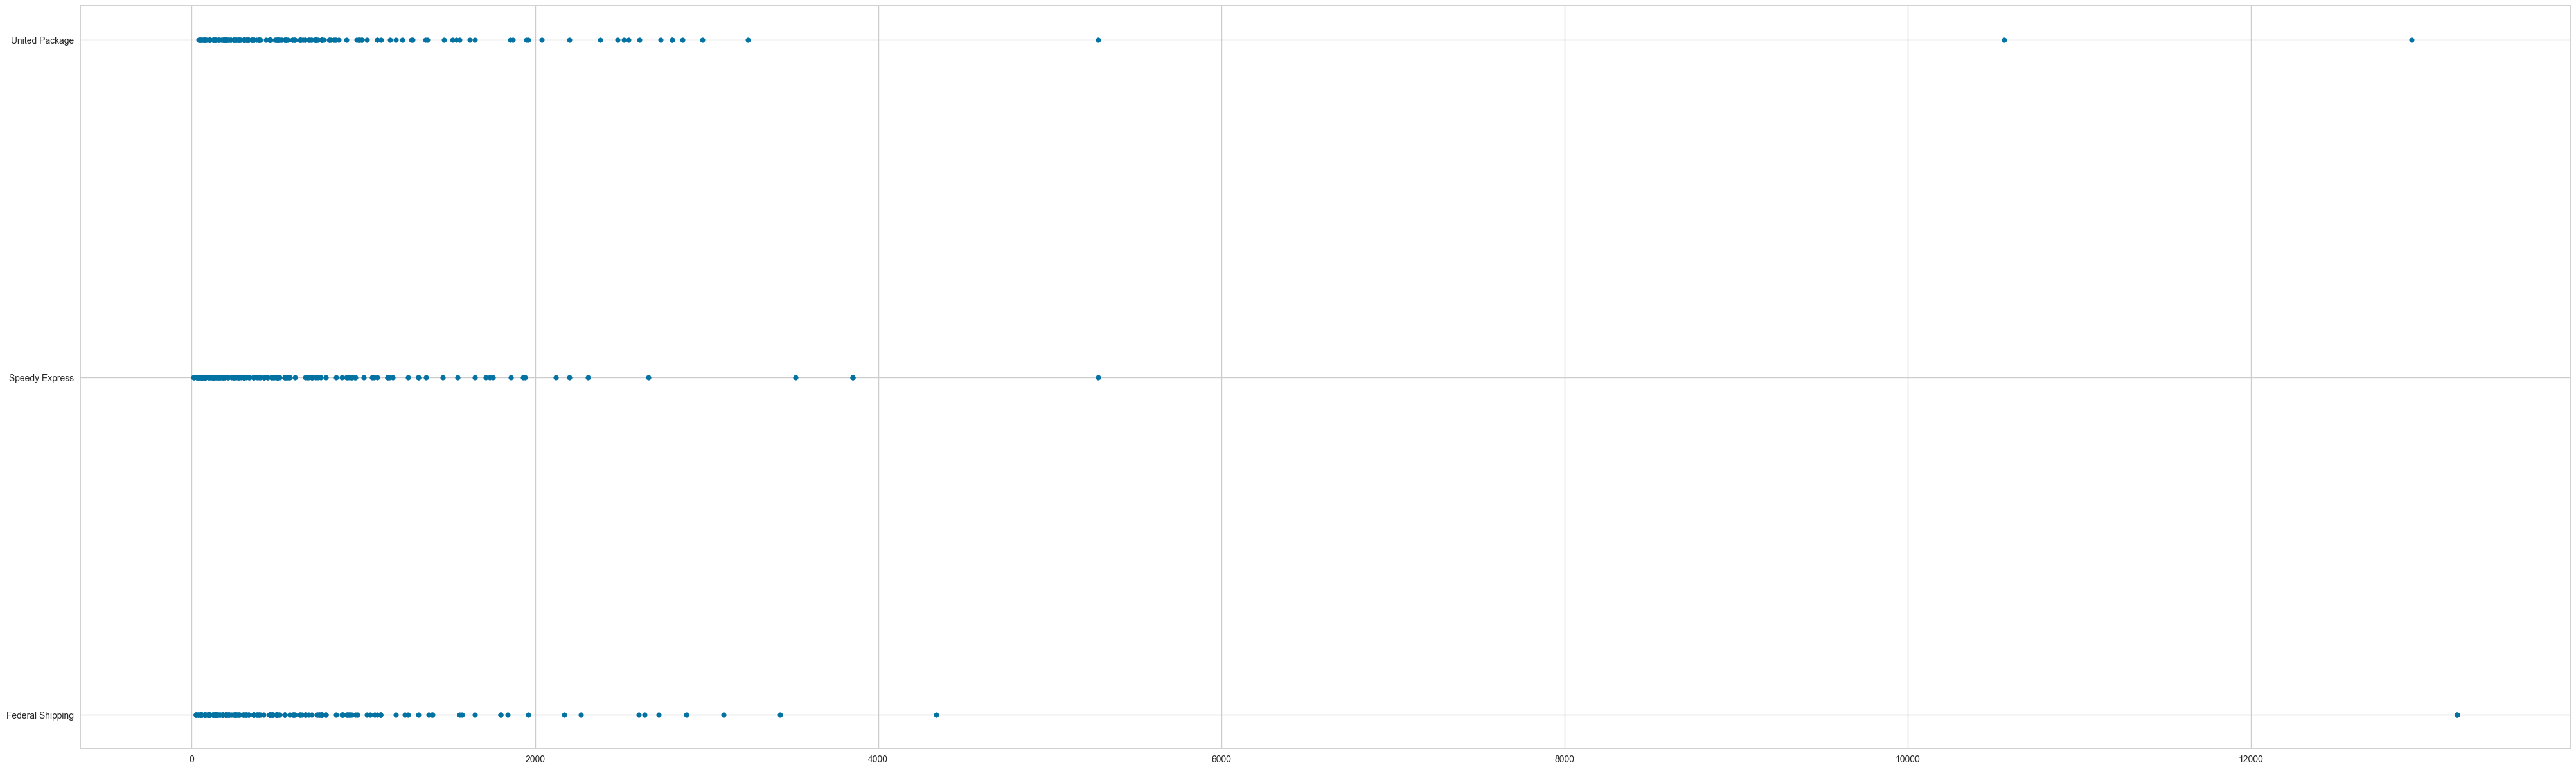

In [140]:
f1 = df['Valor_Total'].values
f2 = df['ShipperName'].values
 
plt.scatter(f1, f2, s=30)
plt.show()

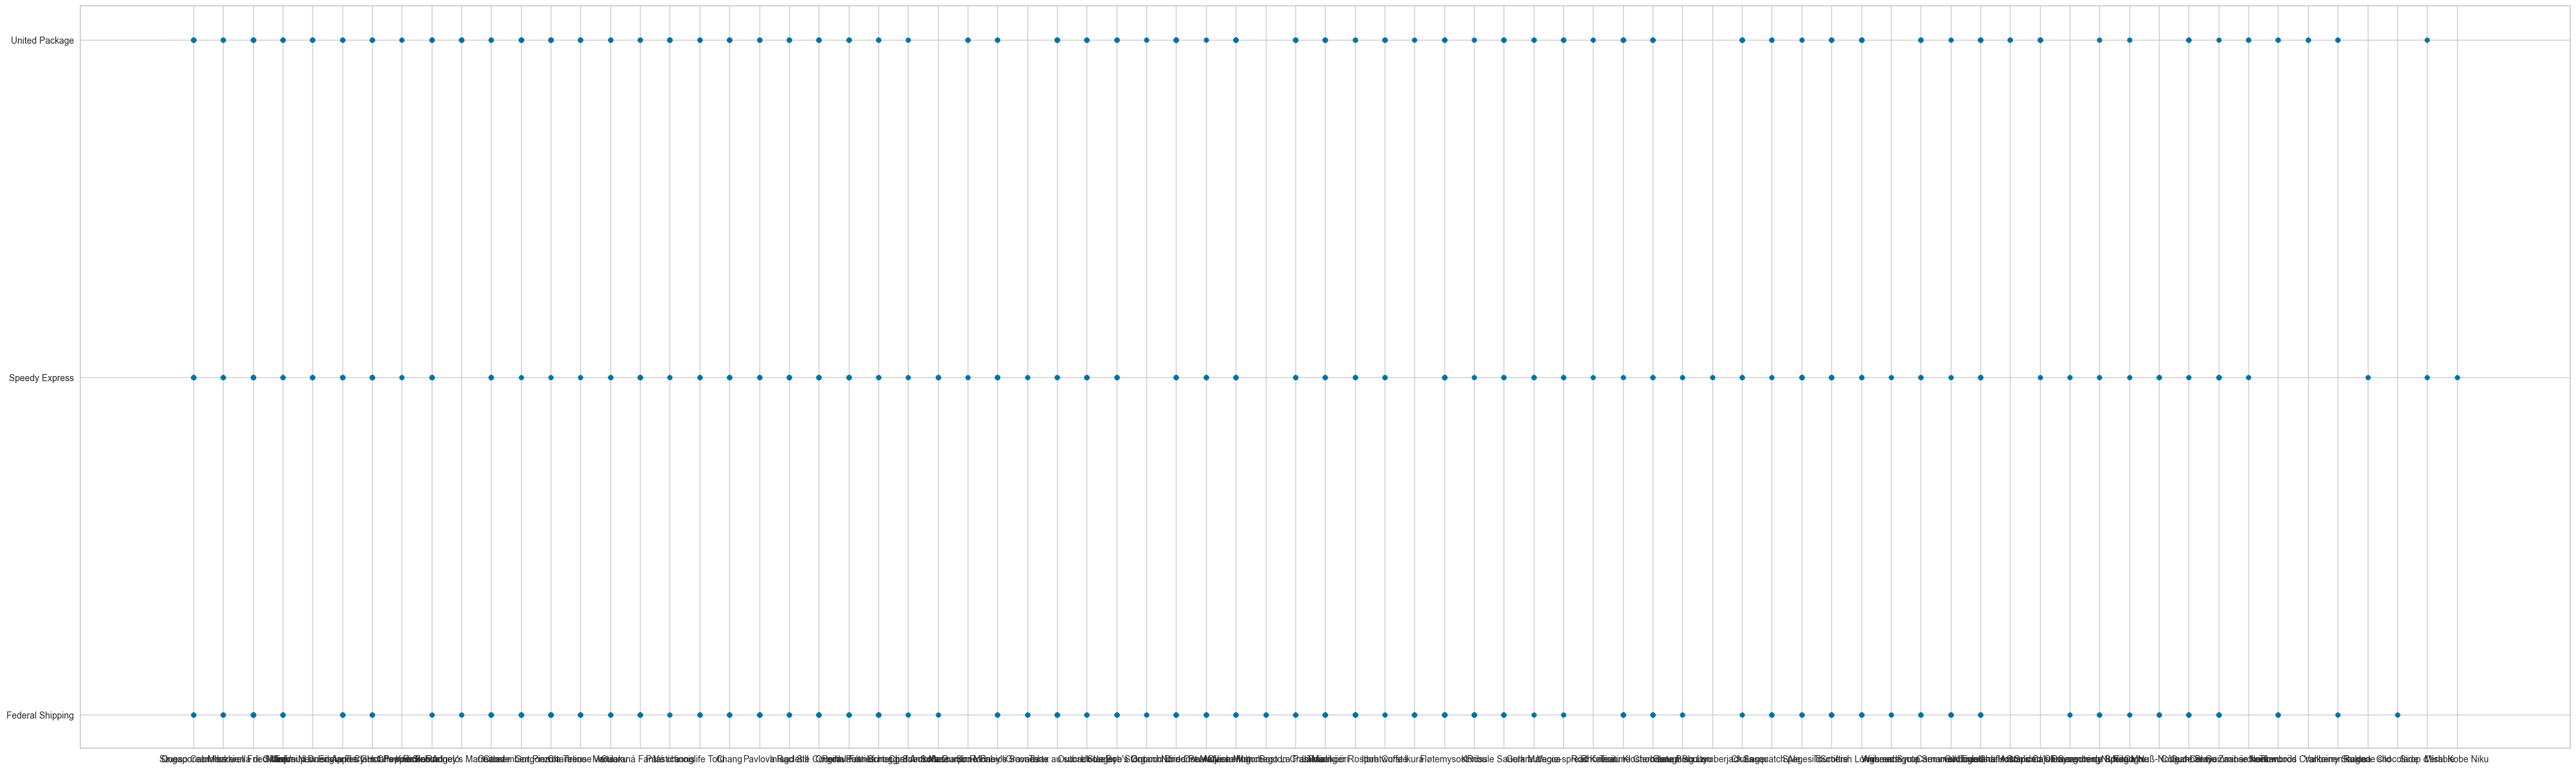

In [141]:
f1 = df['ProductName'].values
f2 = df['ShipperName'].values
 
plt.scatter(f1, f2, s=30)
plt.show()